<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**Additional datasets used**
* [`road_accidents_fatal.csv`](./data/road_accidents_fatal.csv): Monthly total number of accidents leading to fatalities from 2008 to 2022 (Source:https://www.police.gov.sg/-/media/1F7F9460FD8F48928B6DEFE096414975.ashx Table 1B)
* [`road_accidents_injuries.csv`](./data/road_accidents_injuries.csv): Monthly total number of accidents leading to injuries from 2008 to 2022 (Source:https://www.police.gov.sg/-/media/1F7F9460FD8F48928B6DEFE096414975.ashx Table 1C)

## Problem Statement

You work for the Land Transport Authority. Every year, there are road accidents leading to injuries and even fatalities, which could be due to adverse weather conditions. Factors such as slippery roads and lower visibility increases the risk of traffic incidents. 

This analysis aims to allow better planning of traffic management based on weather patterns, to reduce the number of road accidents.

### Outside Research

**1) Adverse weather conditions lead to more road accidents, due to lower visibility and slippery roads.**

Source: https://www.straitstimes.com/singapore/more-road-accidents-on-days-of-thunderstorms

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def get_mean(test_list):
    return sum(test_list)/len(test_list)

list1 = [1, 2, 3, 4, 5]
get_mean(list1)

3.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def get_stdev(test_list):
    sum = 0
    for i in test_list:
        diff = (i - get_mean(test_list))**2
        sum += diff
    return (sum/len(test_list))**(1/2)

get_stdev(list1)

1.4142135623730951

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [3]:
# Imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [4]:
# reading in the data files
df_rainy_days = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
df_rainfall = pd.read_csv('../data/rainfall-monthly-total.csv')
df_accident_fatal = pd.read_csv('../data/road_accidents_fatal.csv')
df_accident_injury = pd.read_csv('../data/road_accidents_injuries.csv')

In [5]:
#print first 5 rows to see data
df_rainy_days.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [6]:
#check for missing data
df_rainy_days.isnull().sum()

month               0
no_of_rainy_days    0
dtype: int64

In [7]:
#check number of observations and features
df_rainy_days.shape

(488, 2)

In [8]:
#print first 5 rows to see data
df_rainfall.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [9]:
#check for missing data
df_rainfall.isnull().sum()

month             0
total_rainfall    0
dtype: int64

In [10]:
#check number of observations and features
df_rainfall.shape

(488, 2)

In [11]:
#print first 5 rows to see data
df_accident_fatal.head()

,month,fatal_accidents
0,2008-01,15
1,2008-02,17
2,2008-03,18
3,2008-04,21
4,2008-05,21


In [12]:
#check for missing data
df_accident_fatal.isnull().sum()

month              0
fatal_accidents    0
dtype: int64

In [13]:
#check number of observations and features
df_accident_fatal.shape

(168, 2)

In [14]:
#print first 5 rows to see data
df_accident_injury.head()

,month,accident_injuries
0,2008-01,735
1,2008-02,589
2,2008-03,695
3,2008-04,697
4,2008-05,685


In [15]:
#check for missing data
df_accident_injury.isnull().sum()

month                0
accident_injuries    0
dtype: int64

In [16]:
#check number of observations and features
df_accident_injury.shape

(168, 2)

In [17]:
#merge datasets
df = pd.merge(left = df_rainy_days,
         right = df_rainfall,
         on = "month", how = 'left')
df = pd.merge(left = df,
         right = df_accident_fatal,
         on = "month", how = 'left')
df = pd.merge(left = df,
         right = df_accident_injury,
         on = "month", how = 'left')

df.head()

,month,no_of_rainy_days,total_rainfall,fatal_accidents,accident_injuries
0,1982-01,10,107.1,NaN,NaN
1,1982-02,5,27.8,NaN,NaN
2,1982-03,11,160.8,NaN,NaN
3,1982-04,14,157.0,NaN,NaN
4,1982-05,10,102.2,NaN,NaN


In [18]:
#check for missing data
df.isnull().sum()

month                  0
no_of_rainy_days       0
total_rainfall         0
fatal_accidents      320
accident_injuries    320
dtype: int64

In [19]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              488 non-null    object 
 1   no_of_rainy_days   488 non-null    int64  
 2   total_rainfall     488 non-null    float64
 3   fatal_accidents    168 non-null    float64
 4   accident_injuries  168 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 22.9+ KB


In [20]:
#rename columns and create new columns
df = df.rename(columns={'month':'year_month','fatal_accidents':'accidents_with_fatalities','accident_injuries':'accidents_with_injuries'})
df[['year', 'month']] = df['year_month'].str.split('-', 1, expand=True)
df['average_rainfall'] = df['total_rainfall']/df['no_of_rainy_days']
df['total_accidents'] = df['accidents_with_fatalities'] + df['accidents_with_injuries']
df.head()

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_6023/567820234.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['year', 'month']] = df['year_month'].str.split('-', 1, expand=True)


,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
0,1982-01,10,107.1,NaN,NaN,1982,01,10.710000,NaN
1,1982-02,5,27.8,NaN,NaN,1982,02,5.560000,NaN
2,1982-03,11,160.8,NaN,NaN,1982,03,14.618182,NaN
3,1982-04,14,157.0,NaN,NaN,1982,04,11.214286,NaN
4,1982-05,10,102.2,NaN,NaN,1982,05,10.220000,NaN


In [21]:
#check the years available for analysis
df.year.unique()

array(['1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'], dtype=object)

In [22]:
#check the months available for analysis
df.month.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [23]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_month                 488 non-null    object 
 1   no_of_rainy_days           488 non-null    int64  
 2   total_rainfall             488 non-null    float64
 3   accidents_with_fatalities  168 non-null    float64
 4   accidents_with_injuries    168 non-null    float64
 5   year                       488 non-null    object 
 6   month                      488 non-null    object 
 7   average_rainfall           488 non-null    float64
 8   total_accidents            168 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 38.1+ KB


In [24]:
#checked that accidents data had missing data because start from 2008. keep for now to answer the compulsory EDA questions.
df.isnull().sum()

year_month                     0
no_of_rainy_days               0
total_rainfall                 0
accidents_with_fatalities    320
accidents_with_injuries      320
year                           0
month                          0
average_rainfall               0
total_accidents              320
dtype: int64

In [25]:
#save cleaned dataset to csv
df.to_csv('../data/merged_data.csv', index=False)

**Data Dictionary**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year_month|object|Period of reference|Year-Month|
|no_of_rainy_days|integer|rainfall-monthly-number-of-rain-days|Total number of days with rain|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm| 
|accidents_with_fatalities|integer|road_accidents_fatal|Total number of accidents leading to fatalities|
|accidents_with_injuries|integer|road_accidents_injuries|Total number of accidents leading to injuries|
|year|object|Period of reference|Year|
|month|object|Period of reference|Month|
|average_rainfall|float|total_rainfall / no_of_rainy_days|Average rainfall per rainy day in mm|
|total_accidents|integer|accidents_with_fatalities + accidents_with_injuries|Total number of accidents|


## Exploratory Data Analysis

In this analysis, we would like to explore if number of accidents increases during adverse weather conditions.

Adverse weather conditions could be identified through:
1) High total rainfall in the month - indicates the general weather condition of the month in terms of how much it rained
2) High number of rainy days in the month - indicates the frequemcy of rain occurences during the month
3) Higher average daily rainfall in the month - indicates the intensity of rain during the rainy days e.g. drizzle vs storm

For the first part of the analysis, we looked at general weather trends:
1) Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
2) Which year have the highest and lowest total rainfall in the date range of analysis?
3) Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
4) Which year have the highest and lowest number of rainy days in the date range of analysis?
5) Are there any outliers months in the dataset?

For the second part of the analysis, we narrowed down to the period 2008-2021 where the traffic accidents data was available. We then aggregated the data by month, and identified months with high number of accidents, before trying to identify correlations with weather-related data.
1) Which months had highest number of accidents?
2) Which months had highest number of rainy days?
3) Which months had highest total rainfall?
4) Which months had highest number of accidents with fatalities?
5) Which months had highest number of accidents with injuries?
6) Which months had had highest average daily rainfall?
7) Is there any correlation between number of rainy days and total rainfall?
8) Is there any correlation between number of accidents with number of rainy days?
9) Is there any correlation between number of accidents with total rainfall?
10) Is there any correlation between number of accidents with average daily rainfall?

In [26]:
#Summary Statistics
df.describe()

,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,average_rainfall,total_accidents
count,488.000000,488.000000,168.000000,168.000000,488.000000,168.000000
mean,14.061475,177.163730,12.196429,643.833333,12.123057,656.029762
std,4.947394,113.916029,4.203305,87.336137,5.920178,89.574672
min,1.000000,0.200000,2.000000,260.000000,0.200000,262.000000
25%,11.000000,93.850000,9.000000,622.000000,8.393421,634.750000
50%,14.000000,159.450000,12.000000,661.000000,11.164103,673.500000
75%,18.000000,238.075000,15.000000,694.000000,15.149918,708.250000
max,27.000000,765.900000,23.000000,791.000000,46.223077,811.000000


In [27]:
#list of column names for numeric variables for reference
col_names = list(df.drop(columns = ['year_month','year','month']).columns.values)
col_names

['no_of_rainy_days',
 'total_rainfall',
 'accidents_with_fatalities',
 'accidents_with_injuries',
 'average_rainfall',
 'total_accidents']

In [28]:
#creating dictionary of standard deviations for numeric variables
sd = {
    'no_of_rainy_days': get_stdev(df['no_of_rainy_days']),
    'total_rainfall': get_stdev(df['total_rainfall']),
    'accidents_with_fatalities': get_stdev(df['accidents_with_fatalities']),
    'accidents_with_injuries': get_stdev(df['accidents_with_injuries']),
    'average_rainfall': get_stdev(df['average_rainfall']),
    'total_accidents': get_stdev(df['total_accidents']),
}

sd

{'no_of_rainy_days': 4.9423221913224085,
 'total_rainfall': 113.79925170470057,
 'accidents_with_fatalities': nan,
 'accidents_with_injuries': nan,
 'average_rainfall': 5.9141087527920115,
 'total_accidents': nan}

In [29]:
#sort month in 1990 from highest rainfall to lowest
df[df['year'] == '1990'].sort_values(by='total_rainfall', ascending = False).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
104,1990-09,17,204.5,NaN,NaN,1990,09,12.029412,NaN
107,1990-12,16,201.1,NaN,NaN,1990,12,12.568750,NaN
106,1990-11,17,180.4,NaN,NaN,1990,11,10.611765,NaN
100,1990-05,11,180.1,NaN,NaN,1990,05,16.372727,NaN
96,1990-01,13,147.4,NaN,NaN,1990,01,11.338462,NaN


September had the highest rainfall in 1990.

In [30]:
#sort month in 1990 from lowest rainfall to highest
df[df['year'] == '1990'].sort_values(by='total_rainfall', ascending = True).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
97,1990-02,8,24.1,NaN,NaN,1990,02,3.012500,NaN
99,1990-04,10,52.4,NaN,NaN,1990,04,5.240000,NaN
105,1990-10,12,56.4,NaN,NaN,1990,10,4.700000,NaN
98,1990-03,4,94.2,NaN,NaN,1990,03,23.550000,NaN
101,1990-06,9,112.6,NaN,NaN,1990,06,12.511111,NaN


February had lowest rainfall in 1990.

In [31]:
#sort month in 2000 from highest rainfall to lowest
df[df['year'] == '2000'].sort_values(by='total_rainfall', ascending = False).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
226,2000-11,21,385.7,NaN,NaN,2000,11,18.366667,NaN
219,2000-04,20,311.6,NaN,NaN,2000,04,15.580000,NaN
216,2000-01,14,275.2,NaN,NaN,2000,01,19.657143,NaN
218,2000-03,15,238.3,NaN,NaN,2000,03,15.886667,NaN
217,2000-02,18,237.8,NaN,NaN,2000,02,13.211111,NaN


November had the highest rainfall in 2000.

In [32]:
#sort month in 2000 from lowest rainfall to highest
df[df['year'] == '2000'].sort_values(by='total_rainfall', ascending = True).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
224,2000-09,12,81.1,NaN,NaN,2000,09,6.758333,NaN
220,2000-05,10,96.8,NaN,NaN,2000,05,9.680000,NaN
223,2000-08,18,113.5,NaN,NaN,2000,08,6.305556,NaN
222,2000-07,12,116.1,NaN,NaN,2000,07,9.675000,NaN
225,2000-10,14,120.9,NaN,NaN,2000,10,8.635714,NaN


September had the lowest rainfall in 2000.

In [33]:
#sort month in 2010 from highest rainfall to lowest
df[df['year'] == '2010'].sort_values(by='total_rainfall', ascending = False).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
342,2010-07,18,298.5,16.0,747.0,2010,07,16.583333,763.0
346,2010-11,21,278.8,14.0,730.0,2010,11,13.276190,744.0
341,2010-06,19,240.5,15.0,651.0,2010,06,12.657895,666.0
338,2010-03,11,238.0,22.0,758.0,2010,03,21.636364,780.0
347,2010-12,14,181.4,14.0,644.0,2010,12,12.957143,658.0


July had the highest rainfall in 2010.

In [34]:
#sort month in 2010 from lowest rainfall to highest
df[df['year'] == '2010'].sort_values(by='total_rainfall', ascending = True).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
337,2010-02,4,6.3,7.0,658.0,2010,02,1.575000,665.0
336,2010-01,10,69.5,17.0,663.0,2010,01,6.950000,680.0
344,2010-09,13,121.5,14.0,738.0,2010,09,9.346154,752.0
340,2010-05,17,157.5,18.0,759.0,2010,05,9.264706,777.0
343,2010-08,16,158.4,20.0,791.0,2010,08,9.900000,811.0


February had the lowest rainfall in 2010.

In [35]:
#sort month in 2020 from highest rainfall to lowest
df[df['year'] == '2020'].sort_values(by='total_rainfall', ascending = False).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
460,2020-05,16,255.6,2.0,260.0,2020,05,15.975000,262.0
467,2020-12,20,253.2,4.0,584.0,2020,12,12.660000,588.0
461,2020-06,21,233.8,7.0,358.0,2020,06,11.133333,365.0
466,2020-11,19,220.6,6.0,479.0,2020,11,11.610526,485.0
459,2020-04,12,188.0,10.0,286.0,2020,04,15.666667,296.0


May had the highest rainfall in 2020.

In [36]:
#sort month in 2020 from lowest rainfall to highest
df[df['year'] == '2020'].sort_values(by='total_rainfall', ascending = True).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
457,2020-02,8,65.0,9.0,480.0,2020,02,8.125000,489.0
465,2020-10,16,78.8,5.0,507.0,2020,10,4.925000,512.0
456,2020-01,6,88.4,11.0,636.0,2020,01,14.733333,647.0
463,2020-08,12,103.4,9.0,428.0,2020,08,8.616667,437.0
458,2020-03,8,108.8,10.0,510.0,2020,03,13.600000,520.0


February had the lowest rainfall in 2020.

In [37]:
#sort year from highest rainfall to lowest
df.groupby('year').sum()[['total_rainfall']].sort_values(by='total_rainfall', ascending = False).head()

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_6023/641648685.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').sum()[['total_rainfall']].sort_values(by='total_rainfall', ascending = False).head()


,total_rainfall
year,
2007,2886.2
2021,2809.6
2001,2783.1
2006,2753.2
2013,2748.4


2007 had the highest rainfall.

In [38]:
#sort year from lowest rainfall to highest
df.groupby('year').sum()[['total_rainfall']].sort_values(by='total_rainfall', ascending = True).head()

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_6023/912332216.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').sum()[['total_rainfall']].sort_values(by='total_rainfall', ascending = True).head()


,total_rainfall
year,
1997,1118.9
2015,1267.1
2022,1278.0
2019,1367.5
1985,1483.9


1997 had the lowest rainfall.

In [39]:
#sort month in 1990 from lowest number of rainy days to highest
df[df['year'] == '1990'].sort_values(by='no_of_rainy_days', ascending = False).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
104,1990-09,17,204.5,NaN,NaN,1990,09,12.029412,NaN
106,1990-11,17,180.4,NaN,NaN,1990,11,10.611765,NaN
107,1990-12,16,201.1,NaN,NaN,1990,12,12.568750,NaN
96,1990-01,13,147.4,NaN,NaN,1990,01,11.338462,NaN
103,1990-08,13,146.6,NaN,NaN,1990,08,11.276923,NaN


September had highest number of rainy days in 1990.

In [40]:
#sort month in 1990 from highest number of rainy days to lowest
df[df['year'] == '1990'].sort_values(by='no_of_rainy_days', ascending = True).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
98,1990-03,4,94.2,NaN,NaN,1990,03,23.550000,NaN
97,1990-02,8,24.1,NaN,NaN,1990,02,3.012500,NaN
101,1990-06,9,112.6,NaN,NaN,1990,06,12.511111,NaN
99,1990-04,10,52.4,NaN,NaN,1990,04,5.240000,NaN
100,1990-05,11,180.1,NaN,NaN,1990,05,16.372727,NaN


March had lowest number of rainy days in 1990.

In [41]:
#sort month in 2000 from lowest number of rainy days to highest
df[df['year'] == '2000'].sort_values(by='no_of_rainy_days', ascending = False).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
226,2000-11,21,385.7,NaN,NaN,2000,11,18.366667,NaN
219,2000-04,20,311.6,NaN,NaN,2000,04,15.580000,NaN
217,2000-02,18,237.8,NaN,NaN,2000,02,13.211111,NaN
223,2000-08,18,113.5,NaN,NaN,2000,08,6.305556,NaN
227,2000-12,18,236.0,NaN,NaN,2000,12,13.111111,NaN


November had highest number of rainy days in 2000.

In [42]:
#sort month in 2000 from highest number of rainy days to lowest
df[df['year'] == '2000'].sort_values(by='no_of_rainy_days', ascending = True).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
220,2000-05,10,96.8,NaN,NaN,2000,05,9.680000,NaN
222,2000-07,12,116.1,NaN,NaN,2000,07,9.675000,NaN
224,2000-09,12,81.1,NaN,NaN,2000,09,6.758333,NaN
216,2000-01,14,275.2,NaN,NaN,2000,01,19.657143,NaN
225,2000-10,14,120.9,NaN,NaN,2000,10,8.635714,NaN


May had lowest number of rainy days in 2000.

In [43]:
#sort month in 2010 from lowest number of rainy days to highest
df[df['year'] == '2010'].sort_values(by='no_of_rainy_days', ascending = False).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
346,2010-11,21,278.8,14.0,730.0,2010,11,13.276190,744.0
341,2010-06,19,240.5,15.0,651.0,2010,06,12.657895,666.0
339,2010-04,18,158.5,18.0,708.0,2010,04,8.805556,726.0
342,2010-07,18,298.5,16.0,747.0,2010,07,16.583333,763.0
340,2010-05,17,157.5,18.0,759.0,2010,05,9.264706,777.0


November had highest number of rainy days in 2010.

In [44]:
#sort month in 2010 from highest number of rainy days to lowest
df[df['year'] == '2010'].sort_values(by='no_of_rainy_days', ascending = True).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
337,2010-02,4,6.3,7.0,658.0,2010,02,1.575000,665.0
336,2010-01,10,69.5,17.0,663.0,2010,01,6.950000,680.0
338,2010-03,11,238.0,22.0,758.0,2010,03,21.636364,780.0
344,2010-09,13,121.5,14.0,738.0,2010,09,9.346154,752.0
347,2010-12,14,181.4,14.0,644.0,2010,12,12.957143,658.0


February had lowest number of rainy days in 2010.

In [45]:
#sort month in 2020 from lowest number of rainy days to highest
df[df['year'] == '2020'].sort_values(by='no_of_rainy_days', ascending = False).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
462,2020-07,22,140.8,3.0,476.0,2020,07,6.400000,479.0
461,2020-06,21,233.8,7.0,358.0,2020,06,11.133333,365.0
467,2020-12,20,253.2,4.0,584.0,2020,12,12.660000,588.0
466,2020-11,19,220.6,6.0,479.0,2020,11,11.610526,485.0
464,2020-09,18,150.2,4.0,472.0,2020,09,8.344444,476.0


July had highest number of rainy days in 2020.

In [46]:
#sort month in 2020 from highest number of rainy days to lowest
df[df['year'] == '2020'].sort_values(by='no_of_rainy_days', ascending = True).head()

,year_month,no_of_rainy_days,total_rainfall,accidents_with_fatalities,accidents_with_injuries,year,month,average_rainfall,total_accidents
456,2020-01,6,88.4,11.0,636.0,2020,01,14.733333,647.0
457,2020-02,8,65.0,9.0,480.0,2020,02,8.125000,489.0
458,2020-03,8,108.8,10.0,510.0,2020,03,13.600000,520.0
459,2020-04,12,188.0,10.0,286.0,2020,04,15.666667,296.0
463,2020-08,12,103.4,9.0,428.0,2020,08,8.616667,437.0


January had lowest number of rainy days in 2020.

In [47]:
#sort year from highest number of rainy days to lowest
df.groupby('year').sum()[['no_of_rainy_days']].sort_values(by='no_of_rainy_days', ascending = False).head()

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_6023/3171016601.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').sum()[['no_of_rainy_days']].sort_values(by='no_of_rainy_days', ascending = False).head()


,no_of_rainy_days
year,
2013,206
2017,204
2007,195
1984,191
2012,191


2013 had the highest number of rainy days.

In [48]:
#sort year from lowest number of rainy days to highest
df.groupby('year').sum()[['no_of_rainy_days']].sort_values(by='no_of_rainy_days', ascending = True).head()

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_6023/2963825871.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').sum()[['no_of_rainy_days']].sort_values(by='no_of_rainy_days', ascending = True).head()


,no_of_rainy_days
year,
1997,116
2019,120
2022,124
2015,125
1982,130


1997 had lowest number of rainy days.

In [49]:
#drop months where accident data not available to start analyzing for problem statement, check remaining months
df.dropna(subset=['total_accidents'], inplace=True)
df.year_month.unique()

array(['2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
       '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
       '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12',
       '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
       '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', 

Analysis will be based on period from January 2008 to December 2021.

In [50]:
#create aggregated dataset using the average values for each month across 2008-2021
df_agg = df.groupby('month').mean()[['total_accidents']]
df_agg['accidents_with_injuries'] = df.groupby('month').mean()[['accidents_with_injuries']]
df_agg['accidents_with_fatalities'] = df.groupby('month').mean()[['accidents_with_fatalities']]
df_agg['total_rainfall'] = df.groupby('month').mean()[['total_rainfall']]
df_agg['no_of_rainy_days'] = df.groupby('month').mean()[['no_of_rainy_days']]
df_agg['average_daily_rainfall'] = df.groupby('month').mean()[['average_rainfall']]
df_agg

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_6023/2760102006.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby('month').mean()[['total_accidents']]
/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_6023/2760102006.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg['accidents_with_injuries'] = df.groupby('month').mean()[['accidents_with_injuries']]
/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_6023/2760102006.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will de

,total_accidents,accidents_with_injuries,accidents_with_fatalities,total_rainfall,no_of_rainy_days,average_daily_rainfall
month,,,,,,
01,687.071429,674.142857,12.928571,204.478571,13.285714,14.496167
02,610.142857,597.785714,12.357143,93.921429,8.071429,8.699069
03,666.428571,653.714286,12.714286,150.857143,11.785714,12.239625
04,638.428571,625.500000,12.928571,161.657143,14.857143,11.360229
05,638.428571,626.285714,12.142857,172.328571,15.285714,11.353035
06,618.571429,606.928571,11.642857,134.114286,13.714286,9.425040
07,671.785714,659.928571,11.857143,138.300000,14.071429,9.827872
08,686.785714,674.642857,12.142857,157.864286,14.500000,10.492007
09,652.285714,641.142857,11.142857,129.128571,13.357143,9.444708


In [51]:
#sort month by highest number of accidents to lowest
df_agg.sort_values(by = 'total_accidents', ascending = False).head()

,total_accidents,accidents_with_injuries,accidents_with_fatalities,total_rainfall,no_of_rainy_days,average_daily_rainfall
month,,,,,,
01,687.071429,674.142857,12.928571,204.478571,13.285714,14.496167
08,686.785714,674.642857,12.142857,157.864286,14.500000,10.492007
11,673.642857,661.357143,12.285714,248.964286,20.857143,11.937041
07,671.785714,659.928571,11.857143,138.300000,14.071429,9.827872
10,670.642857,659.500000,11.142857,161.392857,15.642857,10.315346


January and August had highest number of accidents.

In [52]:
#sort month by highest number of rainy days to lowest
df_agg.sort_values(by = 'no_of_rainy_days', ascending = False).head()

,total_accidents,accidents_with_injuries,accidents_with_fatalities,total_rainfall,no_of_rainy_days,average_daily_rainfall
month,,,,,,
11,673.642857,661.357143,12.285714,248.964286,20.857143,11.937041
12,658.142857,645.071429,13.071429,270.728571,18.785714,14.540068
10,670.642857,659.500000,11.142857,161.392857,15.642857,10.315346
05,638.428571,626.285714,12.142857,172.328571,15.285714,11.353035
04,638.428571,625.500000,12.928571,161.657143,14.857143,11.360229


November and December had highest number of rainy days.

In [53]:
#sort month by highest total rainfall to lowest
df_agg.sort_values(by = 'total_rainfall', ascending = False).head()

,total_accidents,accidents_with_injuries,accidents_with_fatalities,total_rainfall,no_of_rainy_days,average_daily_rainfall
month,,,,,,
12,658.142857,645.071429,13.071429,270.728571,18.785714,14.540068
11,673.642857,661.357143,12.285714,248.964286,20.857143,11.937041
01,687.071429,674.142857,12.928571,204.478571,13.285714,14.496167
05,638.428571,626.285714,12.142857,172.328571,15.285714,11.353035
04,638.428571,625.500000,12.928571,161.657143,14.857143,11.360229


December and November had highest total rainfall.

In [54]:
#sort month by highest number of fatal accidents to lowest
df_agg.sort_values(by = 'accidents_with_fatalities', ascending = False).head()

,total_accidents,accidents_with_injuries,accidents_with_fatalities,total_rainfall,no_of_rainy_days,average_daily_rainfall
month,,,,,,
12,658.142857,645.071429,13.071429,270.728571,18.785714,14.540068
01,687.071429,674.142857,12.928571,204.478571,13.285714,14.496167
04,638.428571,625.500000,12.928571,161.657143,14.857143,11.360229
03,666.428571,653.714286,12.714286,150.857143,11.785714,12.239625
02,610.142857,597.785714,12.357143,93.921429,8.071429,8.699069


December and January had highest number of accidents with fatalities.

In [55]:
#sort month by highest number of accidents with injuries to lowest
df_agg.sort_values(by = 'accidents_with_injuries', ascending = False).head()

,total_accidents,accidents_with_injuries,accidents_with_fatalities,total_rainfall,no_of_rainy_days,average_daily_rainfall
month,,,,,,
08,686.785714,674.642857,12.142857,157.864286,14.500000,10.492007
01,687.071429,674.142857,12.928571,204.478571,13.285714,14.496167
11,673.642857,661.357143,12.285714,248.964286,20.857143,11.937041
07,671.785714,659.928571,11.857143,138.300000,14.071429,9.827872
10,670.642857,659.500000,11.142857,161.392857,15.642857,10.315346


Auguest and January had highest number of accidents with injuries.

In [56]:
#sort month by highest average daily rainfall to lowest
df_agg.sort_values(by = 'average_daily_rainfall', ascending = False).head()

,total_accidents,accidents_with_injuries,accidents_with_fatalities,total_rainfall,no_of_rainy_days,average_daily_rainfall
month,,,,,,
12,658.142857,645.071429,13.071429,270.728571,18.785714,14.540068
01,687.071429,674.142857,12.928571,204.478571,13.285714,14.496167
03,666.428571,653.714286,12.714286,150.857143,11.785714,12.239625
11,673.642857,661.357143,12.285714,248.964286,20.857143,11.937041
04,638.428571,625.500000,12.928571,161.657143,14.857143,11.360229


In summary:
    
    January and August had highest number of accidents.
    November and December had highest number of rainy days.
    December and November had highest total rainfall.
    December and January had highest number of accidents with fatalities.
    Auguest and January had highest number of accidents with injuries.
    December and January had highest average daily rainfall.
    
Finding: Potential correlation between accidents with fatalities and average daily rainfall.


## Visualize the Data

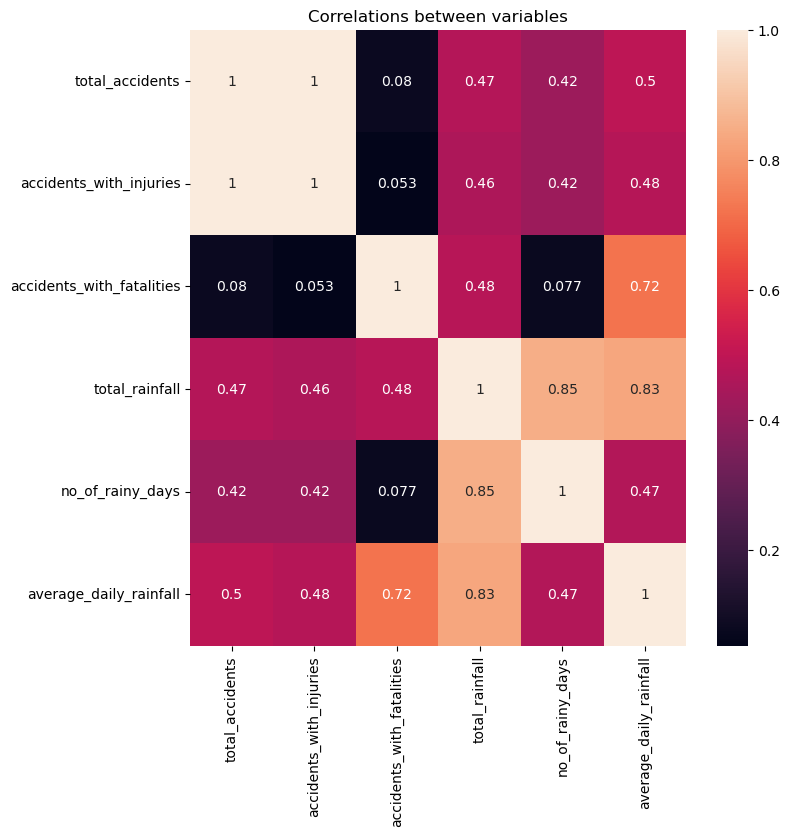

In [57]:
#check correlations between variables
plt.figure(figsize=(8,8))
sns.heatmap(df_agg.corr(), annot = True)
plt.title('Correlations between variables');

1) Highest correlation between total rainfall and number of rainy days, which is expected since having more days of rain would add to total rainfall.
2) Also high correlation between average daily rainfall and accidents with fatalities, which also makes sense as more serious traffic accidents are likely to occur in heavier rain.

In [58]:
#create month variable for plotting charts
df_agg['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df_agg

,total_accidents,accidents_with_injuries,accidents_with_fatalities,total_rainfall,no_of_rainy_days,average_daily_rainfall,month
month,,,,,,,
01,687.071429,674.142857,12.928571,204.478571,13.285714,14.496167,Jan
02,610.142857,597.785714,12.357143,93.921429,8.071429,8.699069,Feb
03,666.428571,653.714286,12.714286,150.857143,11.785714,12.239625,Mar
04,638.428571,625.500000,12.928571,161.657143,14.857143,11.360229,Apr
05,638.428571,626.285714,12.142857,172.328571,15.285714,11.353035,May
06,618.571429,606.928571,11.642857,134.114286,13.714286,9.425040,Jun
07,671.785714,659.928571,11.857143,138.300000,14.071429,9.827872,Jul
08,686.785714,674.642857,12.142857,157.864286,14.500000,10.492007,Aug
09,652.285714,641.142857,11.142857,129.128571,13.357143,9.444708,Sep


Text(0.5, 1.0, 'Mean number of accidents each month from 2008-2021')

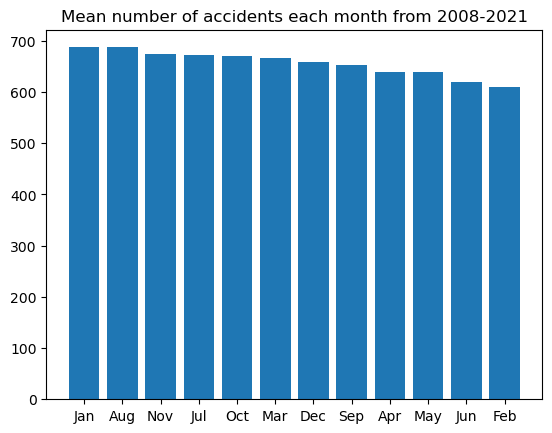

In [59]:
#create bar chart of average monthly total accidents 
data = df_agg.sort_values(by = 'total_accidents', ascending = False)
x = data['month']
y = data['total_accidents']

plt.bar(x,y, data = data)
plt.title('Mean number of accidents each month from 2008-2021')

January and August had highest number of accidents.

Text(0.5, 1.0, 'Mean total rainfall each month from 2008-2021')

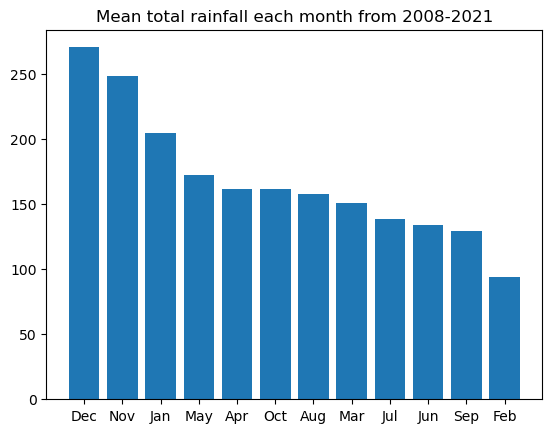

In [60]:
#create bar chart of average monthly total rainfall
data = df_agg.sort_values(by = 'total_rainfall', ascending = False)
x = data['month']
y = data['total_rainfall']

plt.bar(x,y)
plt.title('Mean total rainfall each month from 2008-2021')

December and November had highest total rainfall.

Text(0.5, 1.0, 'Mean number of rainy days each month from 2008-2021')

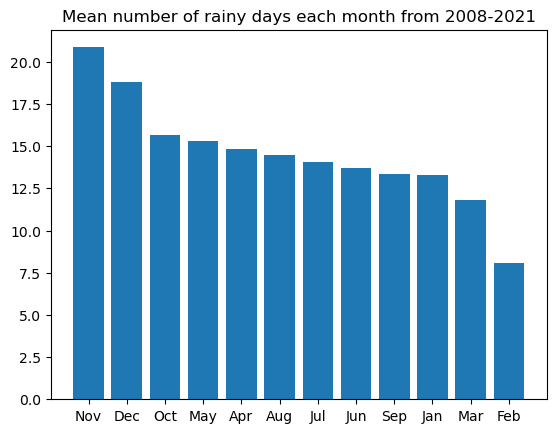

In [61]:
#create bar chart of average monthly number of rainy days
data = df_agg.sort_values(by = 'no_of_rainy_days', ascending = False)
x = data['month']
y = data['no_of_rainy_days']

plt.bar(x,y)
plt.title('Mean number of rainy days each month from 2008-2021')

November and December had highest number of rainy days.

Text(0.5, 1.0, 'Mean number of accidents with fatalities each month from 2008-2021')

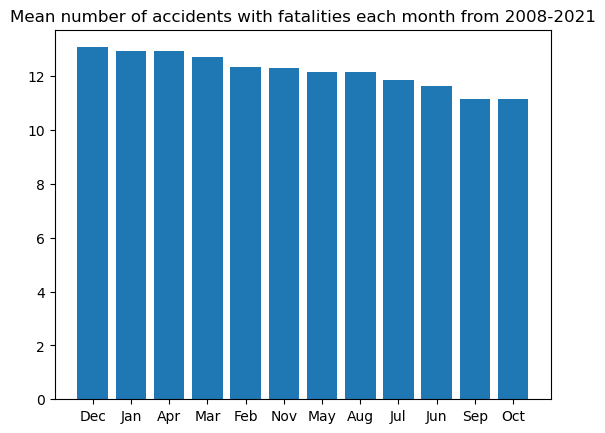

In [62]:
#create bar chart of average monthly total accidents with fatalities
data = df_agg.sort_values(by = 'accidents_with_fatalities', ascending = False)
x = data['month']
y = data['accidents_with_fatalities']

plt.bar(x,y)
plt.title('Mean number of accidents with fatalities each month from 2008-2021')

December and January had highest number of accidents with fatalities.

Text(0.5, 1.0, 'Mean number of accidents with injuries each month from 2008-2021')

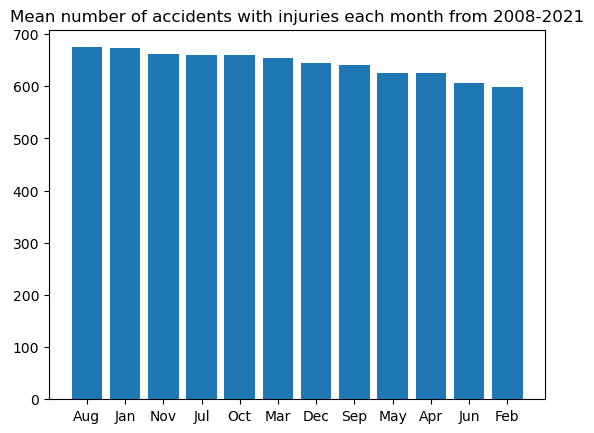

In [63]:
#create bar chart of average monthly total accidents with injuries
data = df_agg.sort_values(by = 'accidents_with_injuries', ascending = False)
x = data['month']
y = data['accidents_with_injuries']

plt.bar(x,y)
plt.title('Mean number of accidents with injuries each month from 2008-2021')

Auguest and January had highest number of accidents with injuries.

Text(0.5, 1.0, 'Average daily rainfall each month from 2008-2021')

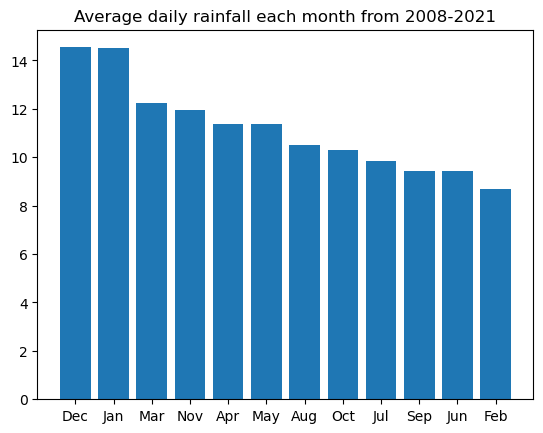

In [64]:
#create bar chart of average daily rainfall each month
data = df_agg.sort_values(by = 'average_daily_rainfall', ascending = False)
x = data['month']
y = data['average_daily_rainfall']

plt.bar(x,y)
plt.title('Average daily rainfall each month from 2008-2021')

December and January had highest average daily rainfall.

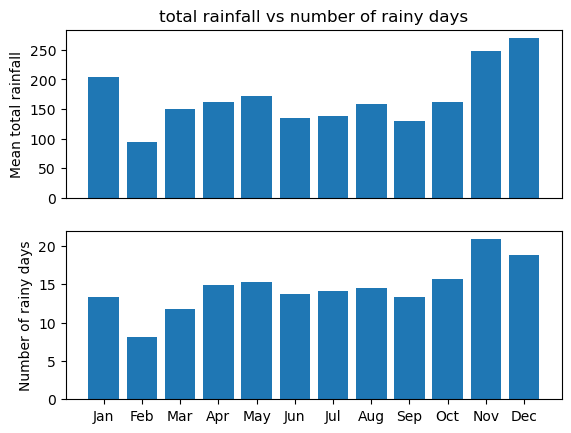

In [65]:
#create bar chart of average monthly total rainfall vs number of rainy days

plt.subplot(2,1,1)
x = df_agg['month']
y1 = df_agg['total_rainfall']

plt.bar(x,y1)
plt.ylabel('Mean total rainfall')
plt.xticks([],[])
plt.title('total rainfall vs number of rainy days')

plt.subplot(2,1,2)
y2 = df_agg['no_of_rainy_days']

plt.bar(x,y2)
plt.ylabel('Number of rainy days')
plt.xticks(x)

plt.show()

As expected, total rainfall follows a similar trend to number of rainy days.

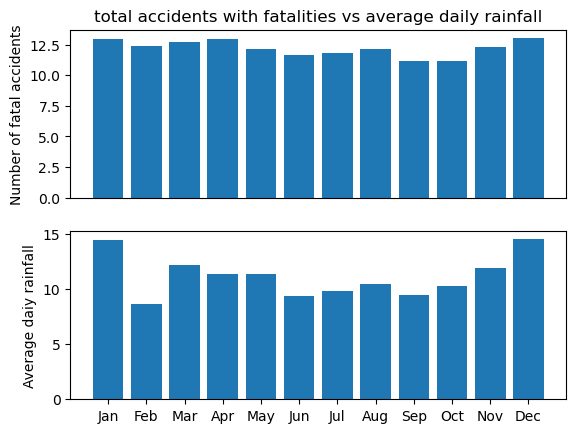

In [66]:
#create bar chart of monthly total accidents with fatalities vs average daily rainfall
plt.subplot(2,1,1)
x = df_agg['month']
y1 = df_agg['accidents_with_fatalities']

plt.bar(x,y1)
plt.ylabel('Number of fatal accidents')
plt.xticks([],[])
plt.title('total accidents with fatalities vs average daily rainfall')

plt.subplot(2,1,2)
y2 = df_agg['average_daily_rainfall']

plt.bar(x,y2)
plt.ylabel('Average daiy rainfall')
plt.xticks(x)

plt.show()

Although we saw high correlation between accidents with fatalities and average daily rainfall, the bar chart shows little variation in the difference between mean number of accidents with fatalities each month.

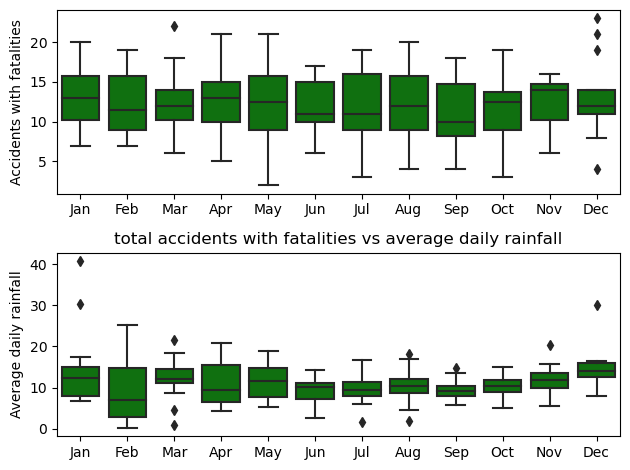

In [67]:
#create distribution chart of total accidents with fatalities vs average daily rainfall
fig, axes = plt.subplots(2,1)

bplot1 = sns.boxplot(df, x='month', y='accidents_with_fatalities', ax=axes[0] , color = 'green')
bplot1.set_xticklabels(df_agg['month'])
bplot1.set_xlabel("")
bplot1.set_ylabel("Accidents with fatalities")
plt.title('total accidents with fatalities vs average daily rainfall')

bplot2 = sns.boxplot(df, x='month', y='average_rainfall', ax=axes[1], color = 'green')
bplot2.set_xticklabels(df_agg['month'])
bplot2.set_xlabel("")
bplot2.set_ylabel("Average daily rainfall")

plt.tight_layout()
plt.show()

Looking at the distribution chart, there seem to be outliers in number of accidents for dec.

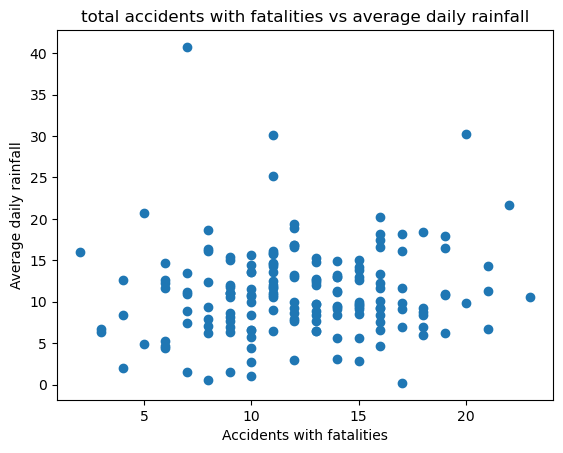

In [68]:
#Create scatterplot of total accidents with fatalities vs average daily rainfall
plt.scatter(df['accidents_with_fatalities'], df['average_rainfall'])

plt.title('total accidents with fatalities vs average daily rainfall')
plt.xlabel("Accidents with fatalities")
plt.ylabel("Average daily rainfall")
plt.show()

Upon closer examination, there seems to be no apparent correlation between accidents with fatalities and average daily rainfall.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**Key Findings:**
1) January and August had highest number of accidents.
2) November and December had highest number of rainy days.
3) December and November had highest total rainfall.
4) December and January had highest number of accidents with fatalities.
5) Auguest and January had highest number of accidents with injuries.
6) December and January had highest average daily rainfall.
7) There is high correlation of 0.85 between number of rainy days and total rainfall.
8) There is high correlation of 0.72 between number of accidents with fatalities and average daily rainfall.
9) The high correlation between number of accidents with fatalities and average daily rainfall could partly be due to outlier number of accidents in months of Dec.
10) A scatterplot of number of accidents with fatalities vs average daily rainfall showed no apparent pattern between the two variables.

**Conclusions:** 

Although initial exploration showed potential correlation between number of accidents with fatalities and the intensity of rain, further analysis showed no conclusive link between the two.

Other independent variables also did not show any correlation.

**Recommendations:** 

As limited features were used here, we recommend to further the analysis by including more features such as visibility levels, surface temperature, humidity, etc, which would allow for more comprehensive analysis.

Although there were no conclusive findings, we still recommend to place higher emphasis on months with higher rainfall such as Nov-Jan (northeast monsoon period) as we would logically expect the risk of traffic accidents to be higher during rain, especially storms, due to reduced visibility and slippery roads.